In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np


In [3]:
# load the dataset
digits = load_digits()

In [4]:
# features 
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [75]:
# targets/ labels
digits.target.shape

(1797,)

## Showing the images and the labels 

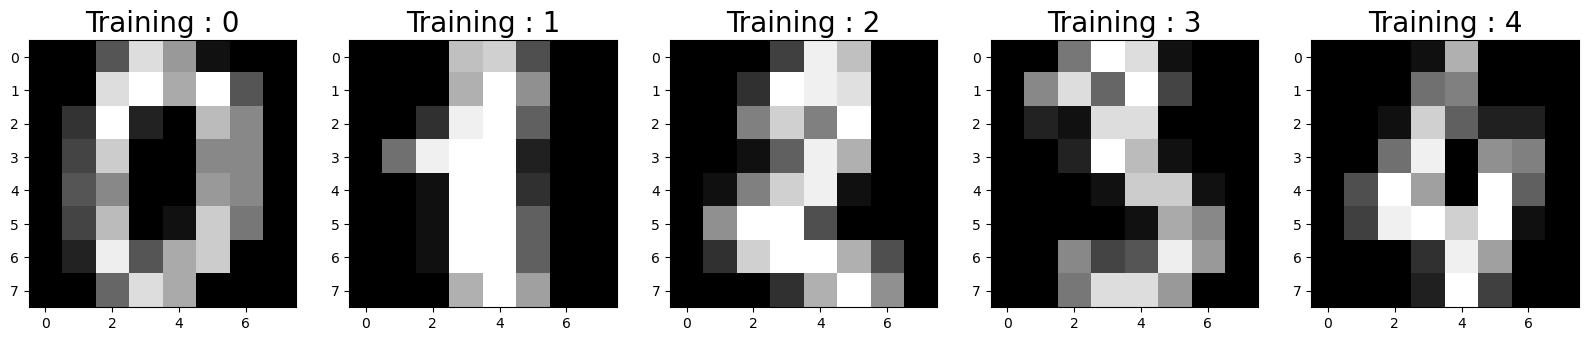

In [76]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[:5], digits.target[:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title(f"Training : {index}", fontsize = 20)

In [77]:
# test_size : what proportion of the original data is to be used for test set
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size= 0.25, random_state=0)

In [78]:
print(f"{x_train.shape} \n{y_train.shape} \n{x_test.shape} \n{y_test.shape}")

(1347, 64) 
(1347,) 
(450, 64) 
(450,)


In [79]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
logistic_regression_model

/Users/aniketkundu12072004/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
# predict the one observation
logistic_regression_model.predict(x_test[0].reshape(1,-1))

array([2])

In [81]:
# predict multiple observations
logistic_regression_model.predict(x_test[:10])


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [82]:
predictions = logistic_regression_model.predict(x_test)
predictions.shape

(450,)

## Measuring Model performance

In [83]:
score = logistic_regression_model.score(x_test, y_test)
print(score)

0.9511111111111111


Text(0.5, 1.0, 'Accuracy Score 0.9511111111111111')

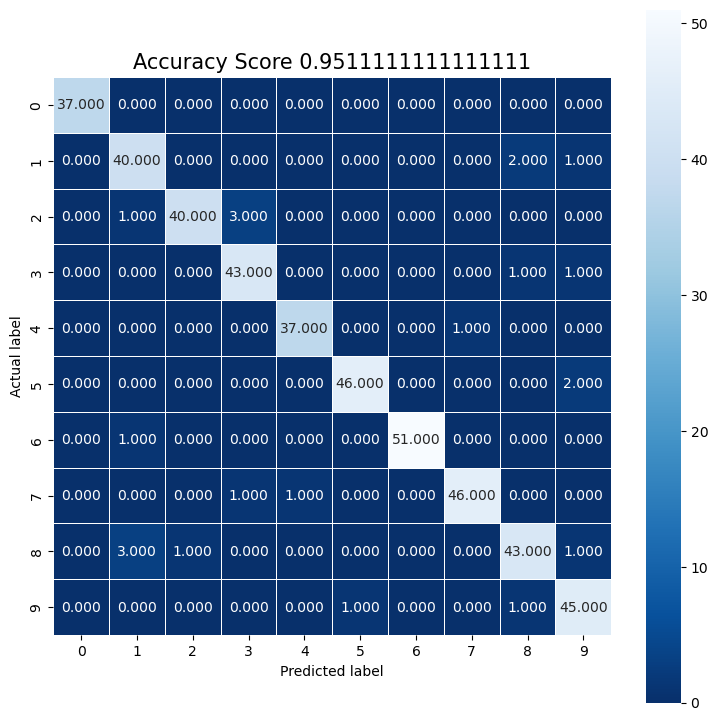

In [84]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, fmt = '.3f', linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Accuracy Score {0}".format(score), size = 15)


In [85]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual:
        misclassifiedIndex.append(index)
    index += 1

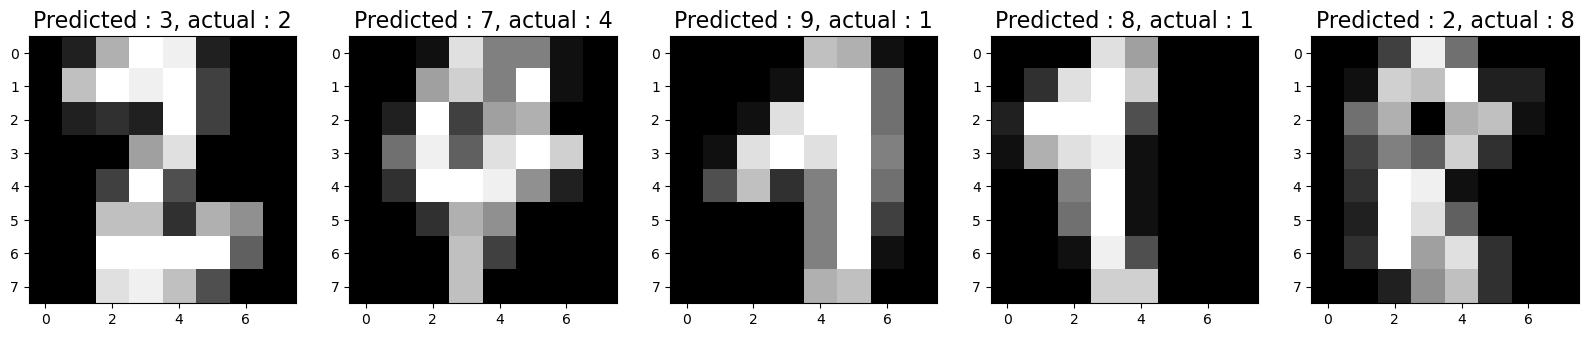

In [86]:
plt.figure(figsize= (20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1,5, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title(f"Predicted : {predictions[wrong]}, actual : {y_test[wrong]}", fontsize= 16)

# Using MNIST dataset

In [87]:
from struct import unpack
from sklearn.datasets import fetch_openml
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

/Users/aniketkundu12072004/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [88]:
print(X.shape,'\n', Y.shape)

(70000, 784) 
 (70000,)


In [89]:
train_img, test_img, train_lbl, test_lbl = train_test_split(X, Y, test_size=1/7.0, random_state= 0)

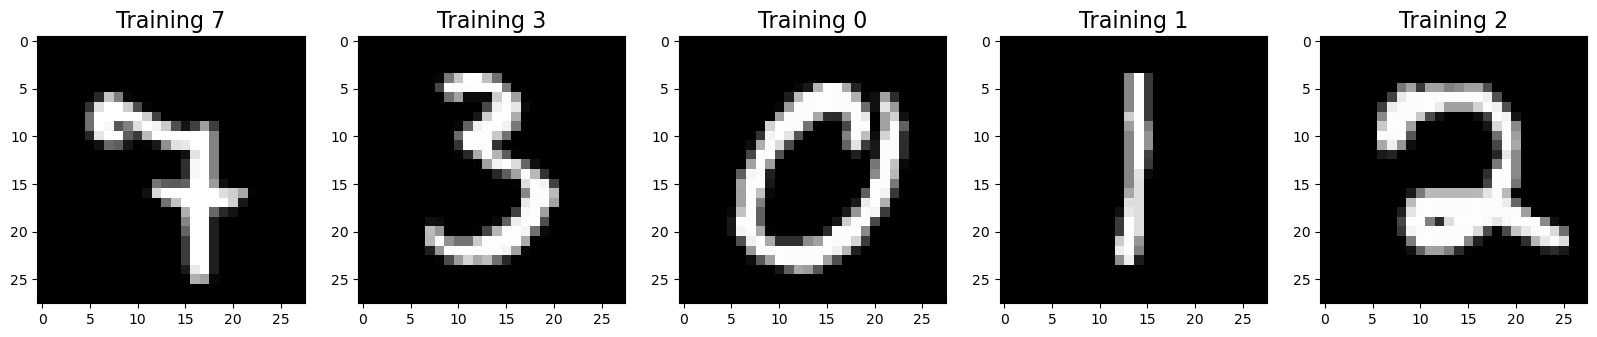

In [91]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[:5], train_lbl[:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (28,28)) , cmap = plt.cm.gray)
    plt.title(f"Training {label}",fontsize = 16)

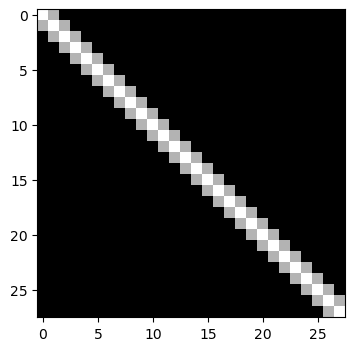

In [97]:
# a simple image using a 2D numpy array
image = np.zeros((28,28))
for x in range(28):
    image[x,x] = 1
    
    if x < 27:
        image[x, x+1] = 0.7
        image[x+1 , x] = 0.7
        
plt.figure(figsize=(4,4,))
plt.imshow(image, cmap = plt.cm.gray)


# Scikit-learn 4-step Modelling Pattern (MNIST)

### Step 1 : Import the model you want to use

In [99]:
from sklearn.linear_model import LogisticRegression

### Step 2 : Make an instance of the Model

In [103]:
# Essentially changing a solver means changing the optimization algorithm
# Default solver is incredibly slow, hence changing it
logReg = LogisticRegression(solver= 'lbfgs')

### Step 3 : Training the model on the data, and storing the information learned from the data

In [112]:
logReg.fit(train_img, train_lbl)

/Users/aniketkundu12072004/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Step 4 : Predict the labels of new data

In [105]:
logReg.predict(test_img[:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

## Measuring Model Performance (MNIST)

In [106]:
# Accuracy defined as : correct predictions/ total number of data points
score = logReg.score(test_img, test_lbl)
print(score)

0.9184


# Displaying Misclassified images with Predicted labels (MNIST)

In [113]:
predictions = logReg.predict(test_img)
index = 0
misclassfiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict:
        misclassfiedIndexes.append(index)
    index += 1

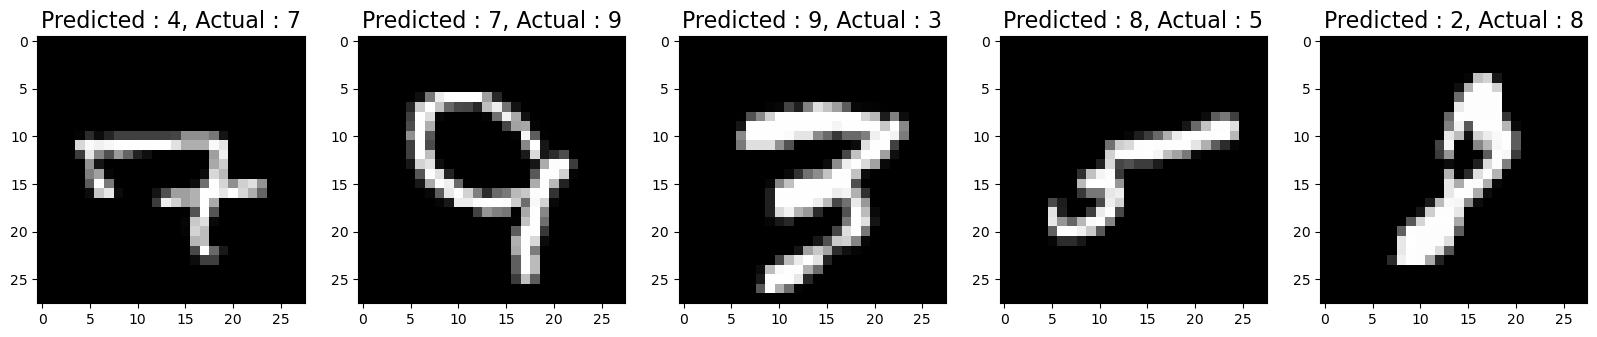

In [115]:
plt.figure(figsize = (20,4))
for plotIndex, badIndex in enumerate(misclassfiedIndexes[:5]):
    plt.subplot(1,5, plotIndex +1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap= plt.cm.gray)
    plt.title(f"Predicted : {predictions[badIndex]}, Actual : {test_lbl[badIndex]}" ,fontsize = 16) 